# Install and Load Modules

In [1]:
!pip install numpy
!pip install matplotlib
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Load and Manipulate Image Files

Photo by Rafael Cisneros Méndez on Unsplash.com: https://unsplash.com/photos/FVQQCoABD8E

In [3]:
img = cv2.imread('./Figures/fig1.jpg')

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(5632, 4224, 3)

### Show Image using OpenCV

In [6]:
cv2.imshow('Figure', img)  # display image in a separate window (not resizeable)
cv2.waitKey()

-1

### Show Image using Matplotlib

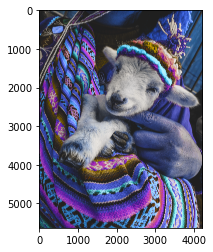

In [7]:
plt.imshow(img)  # BGR channel

### Convert Color Channels to RGB

In [8]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

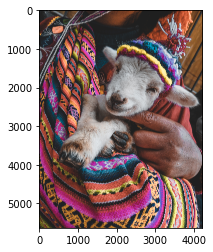

In [9]:
plt.imshow(img_RGB)  # RGB channel

### Read Image as Greyscale

In [10]:
img_greyscale = cv2.imread('./Figures/fig1.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
img_greyscale.shape

(5632, 4224)

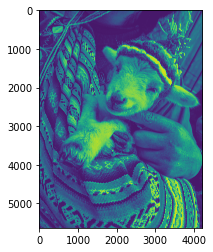

In [12]:
plt.imshow(img_greyscale)  # default color mapping of plt

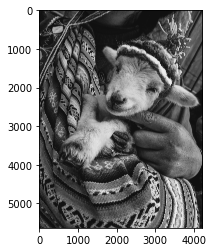

In [13]:
plt.imshow(img_greyscale, cmap='gray')  # display a range of grey

### Resize Image

In [14]:
img_RGB.shape

(5632, 4224, 3)

In [15]:
width = int(4224*2)
height = int(5632/2)
img_resized = cv2.resize(img_RGB, dsize=(width, height))

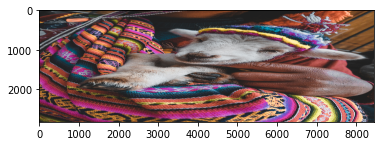

In [16]:
plt.imshow(img_resized)

### Flip Image

In [17]:
img_flipped = cv2.flip(img_RGB, -1)  # 0: flip vertical, 1: horizontal, -1: both

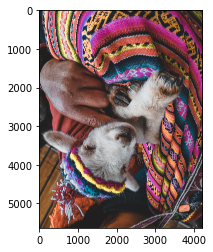

In [18]:
plt.imshow(img_flipped)

### Save Image

In [19]:
cv2.imwrite('./Figures/fig1_flipped.jpg', img_flipped)

True

### Adjust Display Size

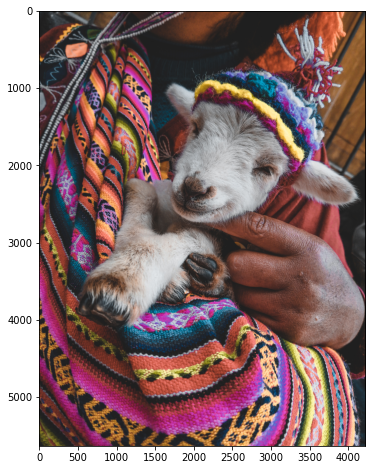

In [20]:
fig = plt.figure(figsize=(10, 8))  # size by inches
ax = fig.add_subplot(111)
ax.imshow(img_RGB)

# Draw Shapes on an Image

In [21]:
canvas = np.zeros(shape=(512, 512, 3), dtype=np.int16)

In [22]:
canvas.shape

(512, 512, 3)

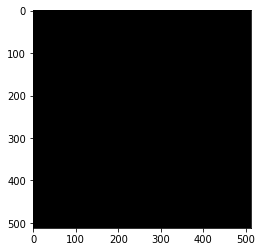

In [23]:
plt.imshow(canvas)

### Draw A Rectangle

In [24]:
cv2.rectangle(img=canvas, pt1=(10, 10), pt2=(150, 100), color=(255, 0, 0), thickness=10)  # pt1=top left, pt2= bottom right

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int16)

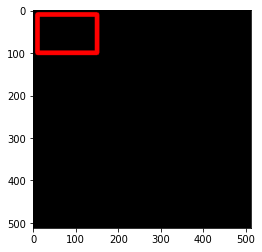

In [25]:
plt.imshow(canvas)

### Draw A Circle

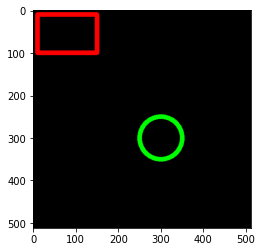

In [26]:
cv2.circle(img=canvas, center=(300, 300), radius=50, color=(0, 255, 0), thickness=10)
plt.imshow(canvas)

### Draw A Filled Circle

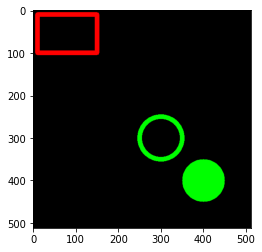

In [27]:
cv2.circle(img=canvas, center=(400, 400), radius=50, color=(0, 255, 0), thickness=-1)
plt.imshow(canvas)

### Draw A Line

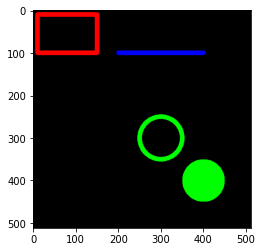

In [28]:
cv2.line(img=canvas, pt1=(200, 100), pt2=(400, 100), color=(0, 0, 255), thickness=10)  # pt1: one end, pt2: another end
plt.imshow(canvas)

### Write Text

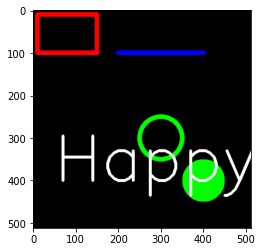

In [29]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(
    img=canvas, 
    text='Happy', 
    org=(50, 400), 
    fontFace=font, 
    fontScale=5, 
    color=(255, 255, 255), 
    thickness=5, 
    lineType=cv2.LINE_AA
)  # org: bottom left of text box

plt.imshow(canvas)

### Draw A Custom Polygon

In [30]:
vertices = np.array([[100, 200], [400, 200], [500, 400], [200, 400]], dtype=np.int32)
vertices.shape

(4, 2)

In [31]:
pts = vertices.reshape((-1, 1, 2))  # add a third dimension
pts.shape

(4, 1, 2)

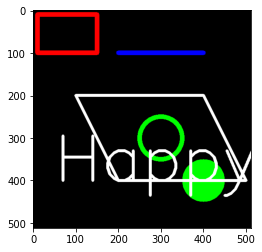

In [32]:
cv2.polylines(canvas, pts=[pts], isClosed=True, color=(255, 255, 255), thickness=5)
plt.imshow(canvas)

# Draw on an Image with a Cursor

In [33]:
def draw_circle(event, x, y, flags, param):  # all params are automatically supplied by setMouseCallback
    '''
    Draw a circle per mouse click. 
    Blue circle for left button, Red circle for right button
    '''
    
    if event == cv2.EVENT_LBUTTONDOWN:  # when left mouse button is pressed down
        cv2.circle(img=canvas, center=(x, y), radius=100, color=(0, 0, 255), thickness=-1)  
    elif event == cv2.EVENT_RBUTTONDOWN: # when right mouse button is pressed down
        cv2.circle(img=canvas, center=(x, y), radius=100, color=(255, 0, 0), thickness=-1)  

In [34]:
win_name = 'Canvas'
cv2.namedWindow(winname=win_name)
canvas = np.zeros(shape=(512, 512, 3))
cv2.setMouseCallback(win_name, draw_circle)  # connect callback with function

while True:
    cv2.imshow(win_name, canvas)
    
    # if window is opened for at least 20 ms and ESC key is pressed, close window
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

In [35]:
is_drawing = False
ix, iy = -1, -1

def draw_rectangle(event, x, y, flags, param):
    '''
    Draw a rectangle by dragging the mouse cursor.
    '''
    
    global ix, iy, is_drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:  # activate drawing
        is_drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:  # draw
        if is_drawing == True:
            cv2.rectangle(img=canvas, pt1=(ix, iy), pt2=(x, y), color=(255, 255, 255), thickness=-1)
            
    elif event == cv2.EVENT_LBUTTONUP:  # deactivate drawing
        is_drawing = False
        cv2.rectangle(img=canvas, pt1=(ix, iy), pt2=(x, y), color=(255, 255, 255), thickness=-1)

In [36]:
win_name = 'Canvas'
cv2.namedWindow(winname=win_name)
canvas = np.zeros(shape=(512, 512, 3)) 
cv2.setMouseCallback(win_name, draw_rectangle)  # connect callback with function

while True:
    cv2.imshow(win_name, canvas)
    
    # if window is opened for at least 20 ms and ESC key is pressed, close window
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

# Next Steps:

- Working with <b>videos</b> using OpenCV
- Additional resource: Useful basic image processing techniques: https://www.youtube.com/watch?v=M_TV4cca7oQ&t=4s